# Soal 1. Pemahaman k-means clustering

Jelaskan bagaimana cara kerja k-means clustering!

Jawab disini:



Analisis Klaster merupakan salah satu metode statistik yang bertujuan untuk memisahkan objek ke dalam beberapa klaster (kelompok data) yang mempunyai sifat :

Objek memiliki karakteristik yang serupa dalam satu klaster
Objek memiliki karakteristik berbeda antar klaster
Secara umum, analisis klaster dibagi menjadi dua yaitu 1] Hierarchical Clustering dan 2] Non Hierarchical Clustering. Perbedaan diantara kedua metode tersebut adalah pada 1] Hierarchical Clustering, jumlah klaster ditentukan kemudian dan pengelompokkan objek ke dalam klaster dilakukan secara bertahap; sedangkan pada 2] Non Hierarchical Clustering, jumlah klaster ditentukan di awal dan pengelompokkan objek ke dalam klaster dilakukan sekaligus.

Salah satu metode Non Hierarchical Clustering yang sering digunakan adalah K-Means Clustering. K-Means Clustering merupakan metode analisis klaster dimana pengguna menentukan jumlah klaster sebanyak ‘k’ yang ingin dibuatnya. Pengklasteran suatu objek didasarkan pada jarak terdekat antara objek tersebut dengan centroid/titik pusat/rata-rata suatu klaster. Cara kerja atau algoritma dari K-Means Clustering adalah sebagai berikut =

Tentukan sebanyak ‘k’ klaster yang ingin dibentuk. 
Kemudian secara acak menempatkan sebanyak ‘k’ titik sebagai centroid awal.
Alokasikan objek ke dalam klaster berdasarkan jarak ke centroid awal terdekat.
Hitung centroid baru yang ada dalam klaster.
Alokasikan kembali objek ke centroid baru yang terdekat.
Kembali langkah 3, sampai tidak terdapat objek yang berpindah klaster atau perubahan nilai centroid.

Download disini [pelanggan.csv](https://drive.google.com/uc?export=download&id=1jX_rLPfcCfzEEgy9xaoALmpqfU2s5TTB)

In [1]:
import pandas as pd
df = pd.read_csv('pelanggan_supermarket.csv')
df.head()

,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
0,1,Laki-laki,19.0,15,39.0
1,2,Laki-laki,21.0,15,81.0
2,3,Perempuan,20.0,16,6.0
3,4,Perempuan,23.0,16,77.0
4,5,Perempuan,31.0,17,40.0


# Soal 2. Clustering data menggunakan k-means clustering

Dalam soal ini, kalian diminta untuk melakukan clustering antara data Umur dan Skor Belanja(1-100). Namun, clustering tidak bisa dilakukan karena data memiliki outlier dan missing value. Maka, lakukanlah tahapan-tahapan berikut:

*   Handling missing value dengan menggunakan method ='ffill'
*   Handling outlier menggunakan metode Interquartile range
*   Lakukan rescaling data menggunakan StandardScaler
*   Lakukan clustering menggunakan kmeans clustering dengan k =2, dan visualisasikan.. 
*   Gunakan Elbow method untuk menemukan jumlah k kluster yang tepat
*   Gunakan k=3 (rekomendasi methode Elbow) lalu visualisasikan
*   Hitung silhoutte Coefficient dari ke dua hasil prediksi klustering tersebut










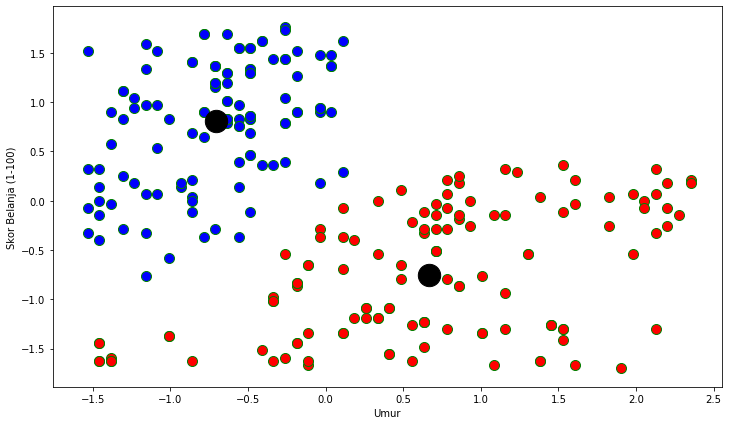

In [3]:
#code here

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# df = df.fillna(method='ffill')

# K MEANS CLUSTERING
df_ = df[['Umur', 'Skor Belanja (1-100)']]
q3 = df_.quantile(.75)
q1 = df_.quantile(.25)
IQR = q3 - q1
df_clean = df_[((df_ >= q1 - 1.5 * IQR) & (df_ <= q3 + 1.5 * IQR))]
df_clean.dropna(axis=0, inplace=True)

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clean.astype(float))

kmeans = KMeans(n_clusters=2).fit(df_scaled)
labels = kmeans.labels_
df_scaled = pd.DataFrame(data=df_scaled, columns=['Umur', 'Skor Belanja (1-100)'])
df_scaled['label'] = labels

df_kmeans_0 = df_scaled[df_scaled['label'] == 0]
df_kmeans_1 = df_scaled[df_scaled['label'] == 1]

fig1, axes1 = plt.subplots(figsize=(12, 7))
axes1.scatter(x=df_kmeans_0['Umur'], y=df_kmeans_0['Skor Belanja (1-100)'], c='red', s=100, edgecolor='green', linestyle='-')
axes1.scatter(x=df_kmeans_1['Umur'], y=df_kmeans_1['Skor Belanja (1-100)'], c='blue', s=100, edgecolor='green', linestyle='-')
axes1.set_xlabel('Umur')
axes1.set_ylabel('Skor Belanja (1-100)')

centers = kmeans.cluster_centers_
axes1.scatter(x=centers[:, 0], y=centers[:, 1], c='black', s=500)
plt.show()

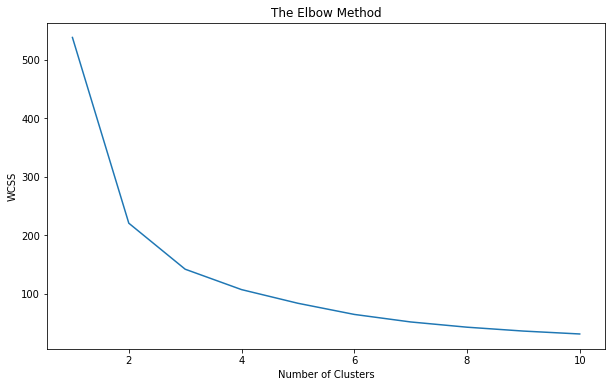

In [4]:
# ELBOW GRAPH
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++').fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

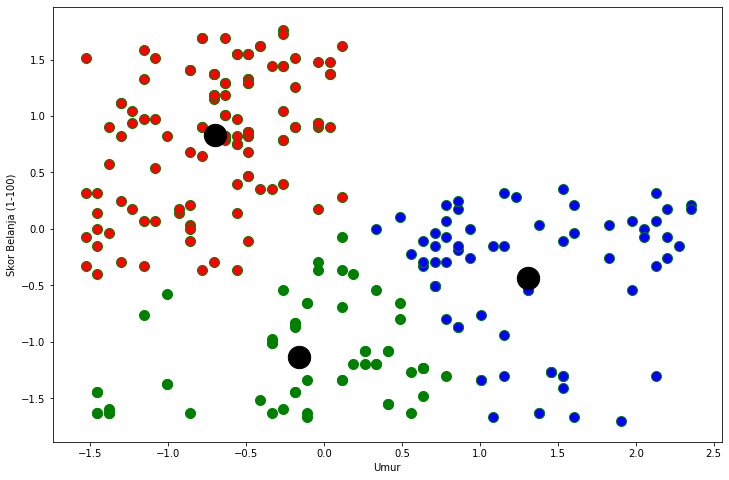

In [5]:
# K MEANS N_CLUSTERS = 3
N = 3
kmeans = KMeans(n_clusters=N, random_state=42).fit(df_scaled)
labels2 = kmeans.labels_
df_scaled['label 2'] = labels2
colors = ['blue', 'red', 'green']
centers2 = kmeans.cluster_centers_
fig, axes = plt.subplots(figsize=(12, 8))

for i in range(N):
    df_kmeans = df_scaled[df_scaled['label 2'] == i]
    axes.scatter(x=df_kmeans['Umur'], y=df_kmeans['Skor Belanja (1-100)'], c=colors[i], s=100, edgecolor='green', linestyle='-')
    axes.scatter(x=centers2[i, 0], y=centers2[i, 1], c='black', s=500)

axes.set_xlabel('Umur')
axes.set_ylabel('Skor Belanja (1-100)')
plt.show()

Expected output:

n_cluster =2

![](https://drive.google.com/uc?id=1RHedPeGR48w-cWl7WWkIsHTSB2DRgynO)


Elbow graph

![](https://drive.google.com/uc?id=1S3_uvQWzJCi8YwSBbpu2imKbUBZ3JdmV)

n_cluster =3

![](https://drive.google.com/uc?id=1EVMDQgPpC8vYpfxilyiJMRDNIr-JXULd)

In [6]:
# SILHOUETTE COEFFICIENT
from sklearn.metrics import silhouette_score

print(silhouette_score(df_scaled, labels))
print(silhouette_score(df_scaled, labels2))

0.48387212554643794
0.6214019478724748


# Soal 3. Analisa Data Hasil Clustering

Dari hasil klustering diatas, buatlah sebuah analisa segmentasi pelanggan untuk kemajuan supermarket. 

Jawab disini:

jika dilihat menggunakan metode elbow maka yang lebih baik adalah membagi pelanggan dalam 3 klaster

-dari 3 klaster tersebut klaster yang memberikan nilai diatas rata-rata adalah yang ada dibawah umur rata-rata sedangkan yang diatas umur rata rata banyak yang memberikan penilaian skor belanja dibawah rata-rata. 

-perlu dilakukan survei kepuasan lebih lanjut yang fokus pada umur diatas rata-rata supermarket.
-supermarket sudah cukup baik dalam melayani kepuasan klaster umur dibawah rata-rata.